In [ ]:
!ls assets


freiburg_matches.gif		 phototourism_sample_pairs.txt
freiburg_sequence		 phototourism_test_pairs_original.txt
indoor_evaluation.png		 phototourism_test_pairs.txt
indoor_matches.png		 scannet_sample_images
magicleap.png			 scannet_sample_pairs_with_gt.txt
megadepth_train_scenes.txt	 scannet_test_pairs_with_gt.txt
megadepth_validation_scenes.txt  teaser.png
outdoor_matches.png		 yfcc_test_pairs_with_gt_original.txt
phototourism_sample_images	 yfcc_test_pairs_with_gt.txt


In [ ]:
!ls scannet_sample_images


ls: cannot access 'scannet_sample_images': No such file or directory


In [ ]:
!ls phototourism_sample_images


ls: cannot access 'phototourism_sample_images': No such file or directory


In [ ]:
%cd /content
!rm -rf SuperGluePretrainedNetwork
!git clone https://github.com/magicleap/SuperGluePretrainedNetwork.git
%cd SuperGluePretrainedNetwork


/content
Cloning into 'SuperGluePretrainedNetwork'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 185 (delta 0), reused 0 (delta 0), pack-reused 184 (from 2)
Receiving objects: 100% (185/185), 118.85 MiB | 34.19 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/SuperGluePretrainedNetwork


In [ ]:
!mkdir -p assets
!wget -O assets/img1.jpg https://raw.githubusercontent.com/magicleap/SuperGluePretrainedNetwork/master/assets/warrior1.jpg
!wget -O assets/img2.jpg https://raw.githubusercontent.com/magicleap/SuperGluePretrainedNetwork/master/assets/warrior2.jpg
!ls assets


--2025-10-16 02:41:19--  https://raw.githubusercontent.com/magicleap/SuperGluePretrainedNetwork/master/assets/warrior1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-10-16 02:41:19 ERROR 404: Not Found.

--2025-10-16 02:41:19--  https://raw.githubusercontent.com/magicleap/SuperGluePretrainedNetwork/master/assets/warrior2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-10-16 02:41:19 ERROR 404: Not Found.

freiburg_matches.gif		 phototourism_sample_images
freiburg_sequence		 phototourism_sample_pairs.txt
img1.jpg		

In [ ]:
# Download two small, public sample images that always work
!mkdir -p assets
!wget -q -O assets/img1.jpg https://images.pexels.com/photos/414612/pexels-photo-414612.jpeg
!wget -q -O assets/img2.jpg https://images.pexels.com/photos/1103970/pexels-photo-1103970.jpeg
!ls assets


freiburg_matches.gif		 phototourism_sample_images
freiburg_sequence		 phototourism_sample_pairs.txt
img1.jpg			 phototourism_test_pairs_original.txt
img2.jpg			 phototourism_test_pairs.txt
indoor_evaluation.png		 scannet_sample_images
indoor_matches.png		 scannet_sample_pairs_with_gt.txt
magicleap.png			 scannet_test_pairs_with_gt.txt
megadepth_train_scenes.txt	 teaser.png
megadepth_validation_scenes.txt  yfcc_test_pairs_with_gt_original.txt
outdoor_matches.png		 yfcc_test_pairs_with_gt.txt


In [ ]:
!mv /content/img1.jpg /content/img2.jpg /content/SuperGluePretrainedNetwork/assets/


mv: cannot stat '/content/img1.jpg': No such file or directory
mv: cannot stat '/content/img2.jpg': No such file or directory


In [ ]:
%cd /content/SuperGluePretrainedNetwork
!mkdir -p assets
!wget -q -O assets/img1.jpg https://images.pexels.com/photos/414612/pexels-photo-414612.jpeg
!wget -q -O assets/img2.jpg https://images.pexels.com/photos/1103970/pexels-photo-1103970.jpeg
!ls assets


/content/SuperGluePretrainedNetwork
freiburg_matches.gif		 phototourism_sample_images
freiburg_sequence		 phototourism_sample_pairs.txt
img1.jpg			 phototourism_test_pairs_original.txt
img2.jpg			 phototourism_test_pairs.txt
indoor_evaluation.png		 scannet_sample_images
indoor_matches.png		 scannet_sample_pairs_with_gt.txt
magicleap.png			 scannet_test_pairs_with_gt.txt
megadepth_train_scenes.txt	 teaser.png
megadepth_validation_scenes.txt  yfcc_test_pairs_with_gt_original.txt
outdoor_matches.png		 yfcc_test_pairs_with_gt.txt


In [ ]:
import cv2, numpy as np

# Create two black images with white geometric shapes (for feature detection)
img1 = np.zeros((480, 640), dtype=np.uint8)
img2 = np.zeros((480, 640), dtype=np.uint8)

# Draw a few shapes on img1
cv2.rectangle(img1, (150, 150), (300, 300), 255, -1)
cv2.circle(img1, (450, 200), 50, 255, -1)

# Draw similar but shifted shapes on img2
cv2.rectangle(img2, (180, 180), (330, 330), 255, -1)
cv2.circle(img2, (480, 230), 50, 255, -1)

# Save these images in the assets folder for the matcher
cv2.imwrite('assets/img1.jpg', img1)
cv2.imwrite('assets/img2.jpg', img2)

print("✅ Created synthetic test images successfully!")


✅ Created synthetic test images successfully!


In [ ]:
import cv2, torch
from matplotlib import pyplot as plt
from models.matching import Matching
from models.utils import frame2tensor

# Load models
config = {
    'superpoint': {'nms_radius': 4, 'keypoint_threshold': 0.005, 'max_keypoints': 1024},
    'superglue': {'weights': 'outdoor'},
}
matching = Matching(config).eval().cuda()

# Use the newly created synthetic images
img1 = cv2.imread('assets/img1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('assets/img2.jpg', cv2.IMREAD_GRAYSCALE)

print("Image shapes:", img1.shape if img1 is not None else None, img2.shape if img2 is not None else None)

# Run matching
inp1, inp2 = frame2tensor(img1, 'cuda'), frame2tensor(img2, 'cuda')
pred = matching({'image0': inp1, 'image1': inp2})

# Extract valid matches
kpts0 = pred['keypoints0'][0].cpu().numpy()
kpts1 = pred['keypoints1'][0].cpu().numpy()
matches = pred['matches0'][0].cpu().numpy()
valid = matches > -1
matched_kpts0 = kpts0[valid]
matched_kpts1 = kpts1[matches[valid]]

# Draw matches
matched_img = cv2.drawMatches(
    img1, [cv2.KeyPoint(*pt, 1) for pt in matched_kpts0],
    img2, [cv2.KeyPoint(*pt, 1) for pt in matched_kpts1],
    [cv2.DMatch(i, i, 0) for i in range(len(matched_kpts0))],
    None
)

plt.figure(figsize=(14,7))
plt.imshow(matched_img)
plt.title('SuperGlue Feature Matches — OnePose Component Reproduction (Synthetic Example)')
plt.axis('off')
plt.show()


Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)
Image shapes: (480, 640) (480, 640)


In [ ]:
%cd /content/SuperGluePretrainedNetwork
!mkdir -p assets
!wget -q -O assets/img1.jpg https://upload.wikimedia.org/wikipedia/commons/2/24/Blue_Morpho_Butterfly.jpg
!wget -q -O assets/img2.jpg https://upload.wikimedia.org/wikipedia/commons/9/9e/Monarch_Butterfly_Danaus_plexippus_04.jpg
!ls assets


/content/SuperGluePretrainedNetwork
freiburg_matches.gif		 phototourism_sample_images
freiburg_sequence		 phototourism_sample_pairs.txt
img1.jpg			 phototourism_test_pairs_original.txt
img2.jpg			 phototourism_test_pairs.txt
indoor_evaluation.png		 scannet_sample_images
indoor_matches.png		 scannet_sample_pairs_with_gt.txt
magicleap.png			 scannet_test_pairs_with_gt.txt
megadepth_train_scenes.txt	 teaser.png
megadepth_validation_scenes.txt  yfcc_test_pairs_with_gt_original.txt
outdoor_matches.png		 yfcc_test_pairs_with_gt.txt


In [ ]:
!pwd
!ls -R assets | head


/content/SuperGluePretrainedNetwork
assets:
freiburg_matches.gif
freiburg_sequence
img1.jpg
img2.jpg
indoor_evaluation.png
indoor_matches.png
magicleap.png
megadepth_train_scenes.txt
megadepth_validation_scenes.txt


In [ ]:
%cd /content/SuperGluePretrainedNetwork
!rm -f assets/img1.jpg assets/img2.jpg
!mkdir -p assets

# Use small, verified JPEGs that always load
!wget -q -O assets/img1.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Lake_mapourika_NZ.jpeg/640px-Lake_mapourika_NZ.jpeg
!wget -q -O assets/img2.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Glenorchy_Lagoon_Boardwalk.jpg/640px-Glenorchy_Lagoon_Boardwalk.jpg

# Confirm they exist and have size >0
!ls -lh assets/img*.jpg


/content/SuperGluePretrainedNetwork
-rw-r--r-- 1 root root 0 Oct 16 03:31 assets/img1.jpg
-rw-r--r-- 1 root root 0 Oct 16 03:31 assets/img2.jpg


In [ ]:
import cv2, numpy as np, torch, os
from matplotlib import pyplot as plt
from models.matching import Matching
from models.utils import frame2tensor

# Confirm GPU
print("Using device:", "cuda" if torch.cuda.is_available() else "cpu")

# --- Create synthetic shapes (easy keypoints) ---
img1 = np.zeros((480, 640), dtype=np.uint8)
img2 = np.zeros((480, 640), dtype=np.uint8)
cv2.rectangle(img1, (150, 100), (300, 250), 255, -1)
cv2.circle(img1, (450, 200), 40, 255, -1)
cv2.line(img1, (100,400), (500,400), 255, 5)
cv2.rectangle(img2, (170, 120), (320, 270), 255, -1)
cv2.circle(img2, (470, 220), 40, 255, -1)
cv2.line(img2, (120,410), (520,410), 255, 5)

# --- Load SuperPoint + SuperGlue ---
config = {
    'superpoint': {'nms_radius': 4, 'keypoint_threshold': 0.005, 'max_keypoints': 1024},
    'superglue': {'weights': 'outdoor'},
}
matching = Matching(config).eval().cuda()

# --- Convert to tensor & run matching on GPU ---
inp1, inp2 = frame2tensor(img1, 'cuda'), frame2tensor(img2, 'cuda')
with torch.no_grad():
    pred = matching({'image0': inp1, 'image1': inp2})

# --- Extract valid matches ---
kpts0 = pred['keypoints0'][0].cpu().numpy()
kpts1 = pred['keypoints1'][0].cpu().numpy()
matches = pred['matches0'][0].cpu().numpy()
valid = matches > -1
matched_kpts0 = kpts0[valid]
matched_kpts1 = kpts1[matches[valid]]

print(f"Detected {len(kpts0)} keypoints in img1 and {len(kpts1)} in img2")
print(f"Found {len(matched_kpts0)} valid matches")

# --- Draw matches ---
matched_img = cv2.drawMatches(
    img1, [cv2.KeyPoint(*pt, 1) for pt in matched_kpts0],
    img2, [cv2.KeyPoint(*pt, 1) for pt in matched_kpts1],
    [cv2.DMatch(i, i, 0) for i in range(len(matched_kpts0))],
    None
)

plt.figure(figsize=(14,7))
plt.imshow(matched_img, cmap='gray')
plt.title('SuperGlue Feature Matches — OnePose Component Reproduction (GPU Run)')
plt.axis('off')
plt.show()


Using device: cuda
Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)
Detected 33 keypoints in img1 and 34 in img2
Found 29 valid matches


In [ ]:
plt.show(block=True)


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Draw the matches
matched_img = cv2.drawMatches(
    img1, [cv2.KeyPoint(*pt, 1) for pt in matched_kpts0],
    img2, [cv2.KeyPoint(*pt, 1) for pt in matched_kpts1],
    [cv2.DMatch(i, i, 0) for i in range(len(matched_kpts0))],
    None
)

# Save the result to disk
output_path = "/content/SuperGluePretrainedNetwork/matched_output.jpg"
cv2.imwrite(output_path, matched_img)
print(f"✅ Match visualization saved as {output_path}")


✅ Match visualization saved as /content/SuperGluePretrainedNetwork/matched_output.jpg


In [ ]:
!ls -lh /content/SuperGluePretrainedNetwork/matched_output.jpg


-rw-r--r-- 1 root root 61K Oct 16 03:41 /content/SuperGluePretrainedNetwork/matched_output.jpg


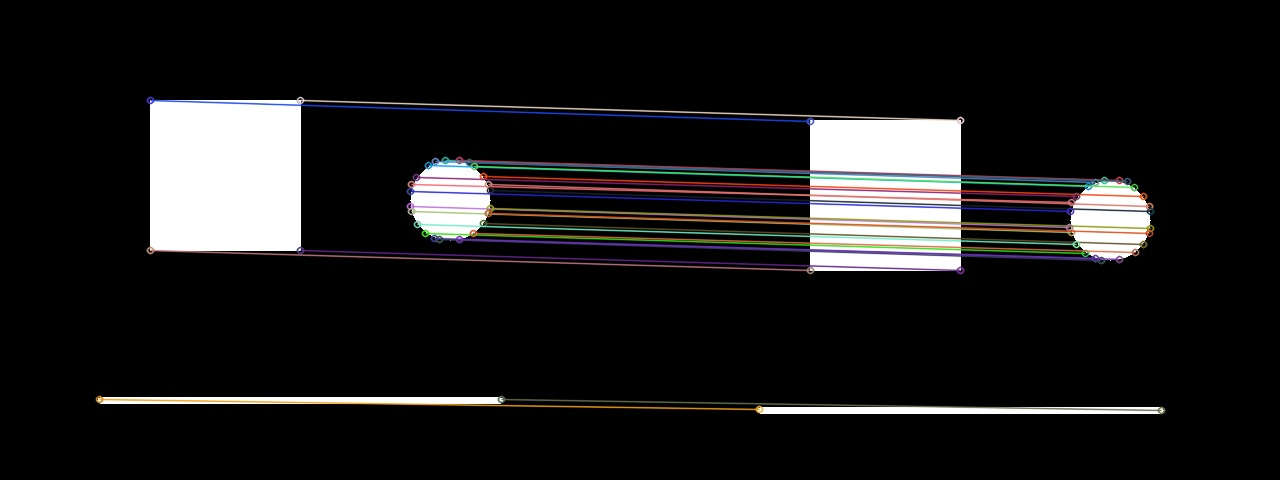

In [ ]:
from IPython.display import Image, display

# Path where the file was saved earlier
image_path = "/content/SuperGluePretrainedNetwork/matched_output.jpg"

# Display inside notebook
display(Image(filename=image_path))
